In [27]:
import numpy as np
import matplotlib.pyplot as plt

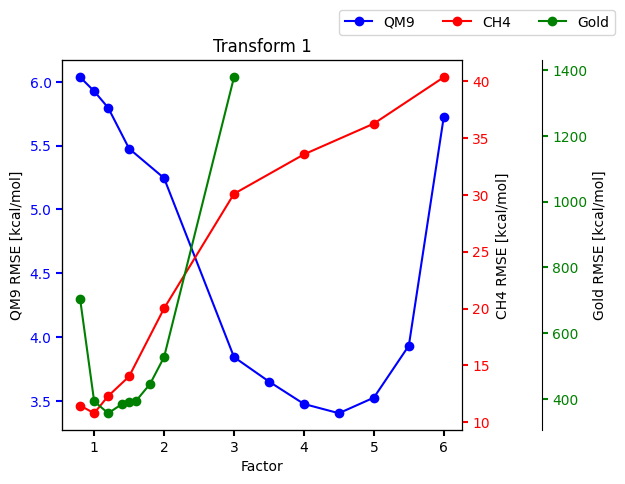

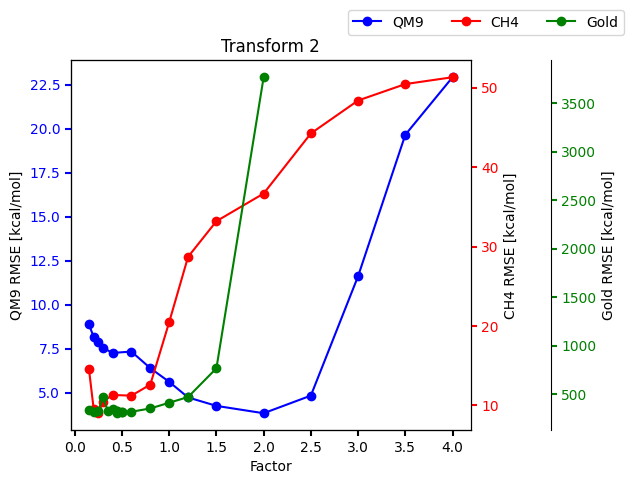

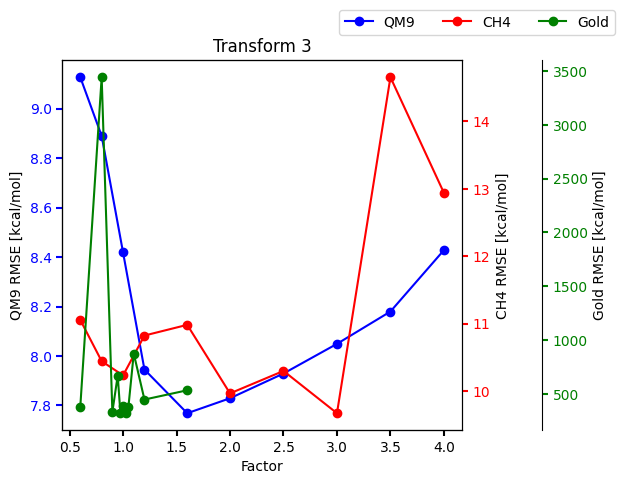

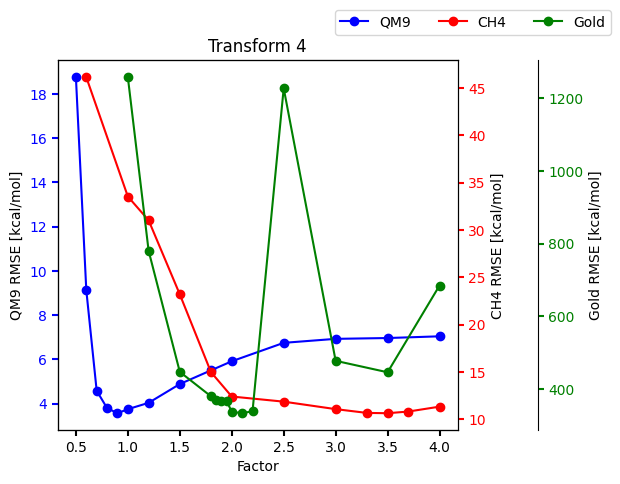

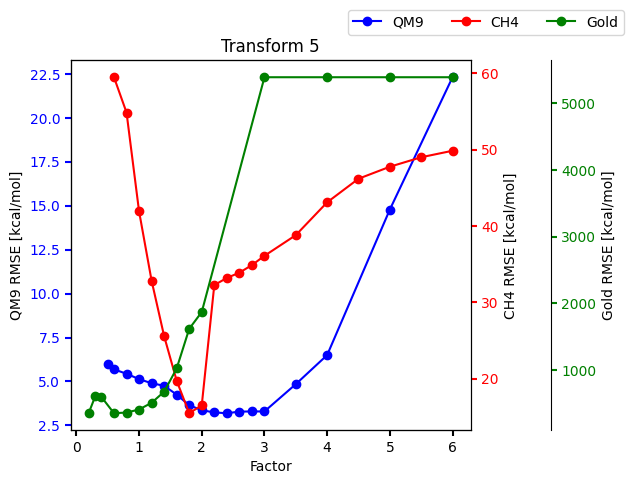

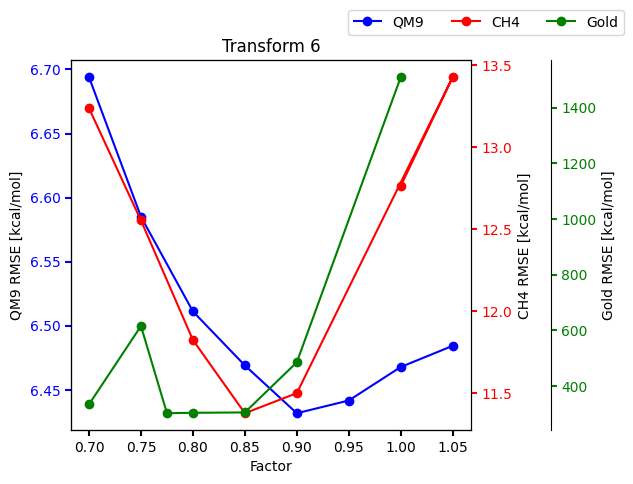

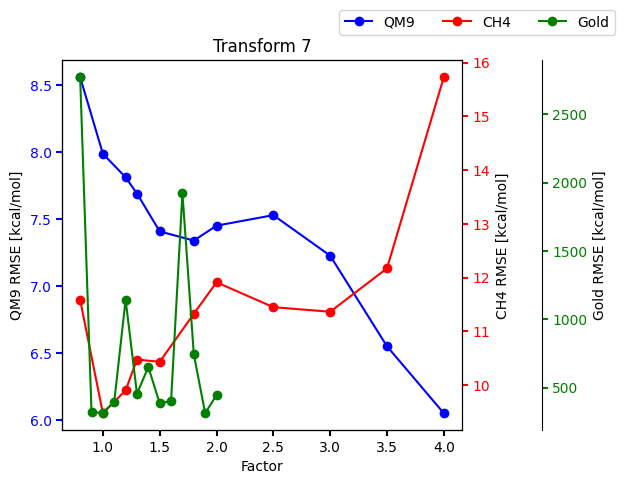

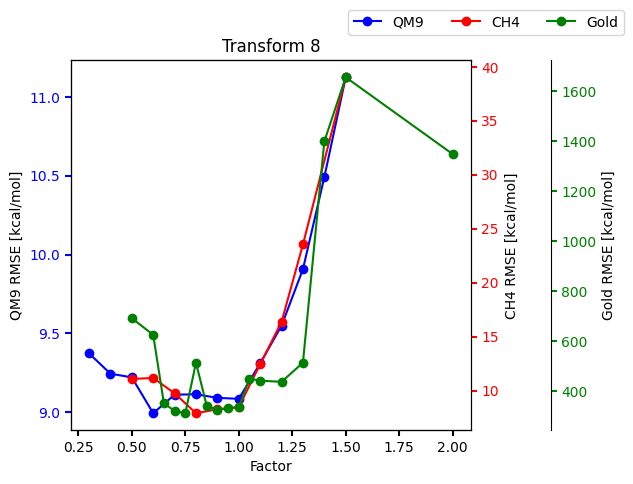

In [28]:
Path = '/home/ach/radial-physics_new/radial-physics/output/dataset_comp_old_calcs'

no_of_tr = 8
minimia_all_tr_qm9 = []
minimia_all_tr_ch4 = []
minimia_all_tr_gold = []

for i in range(1,no_of_tr+1):
    
    #Define/reset lists + open data
    factor_qm9 = [] #QM9
    rmse_qm9 = []
    data_qm9 = open(Path+f'/Data_TR{i}_qm9','r')

    factor_gold = [] #Gold
    rmse_gold = []
    data_gold = open(Path+f'/Data_TR{i}_gold','r')

    factor_ch4 = [] #Methane
    rmse_ch4 = []
    data_ch4 = open(Path+f'/Data_TR{i}_ch4','r')

    for row in data_qm9: #QM9
        row = row.split(' ')
        factor_qm9.append(float(row[0]))
        rmse_qm9.append(float(row[1]))
    
    for row in data_gold: #Gold
        row = row.split(' ')
        factor_gold.append(float(row[0]))
        rmse_gold.append(float(row[1]))
    
    for row in data_ch4: #Methane
        row = row.split(' ')
        factor_ch4.append(float(row[0]))
        rmse_ch4.append(float(row[1]))
    
    #indices of minima and minima (for plot later)
    minimum_indx_qm9 = np.argmin(rmse_qm9,axis=0)
    minimum_indx_ch4 = np.argmin(rmse_ch4,axis=0)
    minimum_indx_gold = np.argmin(rmse_gold,axis=0)
    
    minimia_all_tr_qm9.append(rmse_qm9[minimum_indx_qm9])
    minimia_all_tr_ch4.append(rmse_ch4[minimum_indx_ch4])
    minimia_all_tr_gold.append(rmse_gold[minimum_indx_gold])


    fig, ax = plt.subplots()
    fig.subplots_adjust(right=0.75)

    twin1 = ax.twinx()
    twin2 = ax.twinx()

    # Offset the right spine of twin2.  The ticks and label have already been
    # placed on the right by twinx above.
    twin2.spines.right.set_position(("axes", 1.2))

    p1, = ax.plot(factor_qm9, rmse_qm9 , "b-o", label="QM9")
    p2, = twin1.plot(factor_ch4, rmse_ch4, "r-o", label="CH4")
    p3, = twin2.plot(factor_gold, rmse_gold, "g-o", label="Gold")

    # ax.set_xlim(0, 2)
    # ax.set_ylim(0, 2)
    # twin1.set_ylim(0, 4)
    # twin2.set_ylim(1, 65)

    ax.set_xlabel("Factor")
    ax.set_ylabel("QM9 RMSE [kcal/mol]")
    ax.set_title(f"Transform {i}")
    twin1.set_ylabel("CH4 RMSE [kcal/mol]")
    twin2.set_ylabel("Gold RMSE [kcal/mol]")

    # ax.yaxis.label.set_color(p1.get_color())
    # twin1.yaxis.label.set_color(p2.get_color())
    # twin2.yaxis.label.set_color(p3.get_color())

    tkw = dict(size=4, width=1.5)
    ax.tick_params(axis='y', colors=p1.get_color(), **tkw)
    twin1.tick_params(axis='y', colors=p2.get_color(), **tkw)
    twin2.tick_params(axis='y', colors=p3.get_color(), **tkw)
    ax.tick_params(axis='x', **tkw)

    # ax.legend(handles=[p1, p2, p3], loc = 'best')
    fig.legend(bbox_to_anchor=(1, 1.), ncol=5)

    plt.show()
    

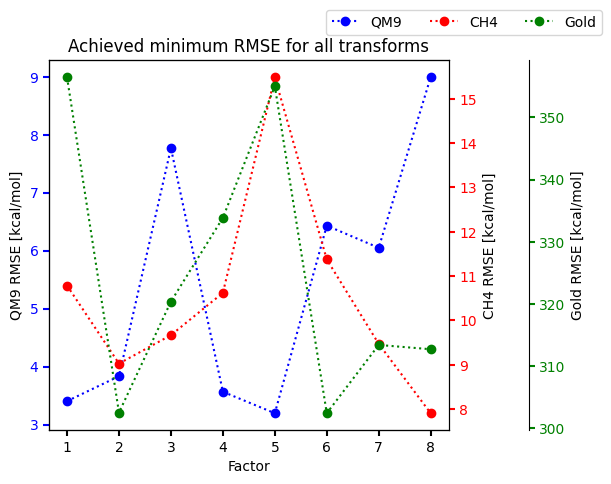

In [29]:
### one plot for each data set with all minima:


fig, ax = plt.subplots()
fig.subplots_adjust(right=0.75)

twin1 = ax.twinx()
twin2 = ax.twinx()

# Offset the right spine of twin2.  The ticks and label have already been
# placed on the right by twinx above.
twin2.spines.right.set_position(("axes", 1.2))

p1, = ax.plot(range(1,no_of_tr+1), minimia_all_tr_qm9 , "bo", label="QM9", ls = ':')
p2, = twin1.plot(range(1,no_of_tr+1), minimia_all_tr_ch4, "r:o", label="CH4")
p3, = twin2.plot(range(1,no_of_tr+1), minimia_all_tr_gold, "g:o", label="Gold")

# ax.set_xlim(0, 2)
# ax.set_ylim(0, 2)
# twin1.set_ylim(0, 4)
# twin2.set_ylim(1, 65)

ax.set_xlabel("Factor")
ax.set_ylabel("QM9 RMSE [kcal/mol]")
ax.set_title("Achieved minimum RMSE for all transforms")
twin1.set_ylabel("CH4 RMSE [kcal/mol]")
twin2.set_ylabel("Gold RMSE [kcal/mol]")

# ax.yaxis.label.set_color(p1.get_color())
# twin1.yaxis.label.set_color(p2.get_color())
# twin2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=4, width=1.5)
ax.tick_params(axis='y', colors=p1.get_color(), **tkw)
twin1.tick_params(axis='y', colors=p2.get_color(), **tkw)
twin2.tick_params(axis='y', colors=p3.get_color(), **tkw)
ax.tick_params(axis='x', **tkw)

# ax.legend(handles=[p1, p2, p3], loc = 'best')
fig.legend(bbox_to_anchor=(1, 1.), ncol=5)

# plt.show()
# plt.plot(range(1,9),minimia_all_tr_qm9 ,"bo", label = 'QM9')
# plt.plot(range(1,9),minimia_all_tr_ch4, "ro", label = 'CH4')
# plt.plot(range(1,9),minimia_all_tr_gold, "go", label = 'Gold')
# plt.title('make title')
# plt.xlabel('Transforms')
# plt.ylabel('sth')
# plt.legend()
# plt.show()